In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
import datetime

Using TensorFlow backend.


In [2]:
my_data = pd.read_csv("C://Users//QWERTY//Desktop//PROJECT//training_data_for_students_0.csv")
# So first of all let's get introduced with out dataset
my_data


C:\Users\QWERTY\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (16,18,22,23,25,30,31,36,37,95,100,101,106,107) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,search_query,search_id,search_type,search_datetime,search_source,search_user_location,provider,flight_date,routes,origin_country,...,leg_3_segment_0_baggage_unit,leg_3_segment_1_baggage_unit,leg_3_segment_2_baggage_unit,leg_3_segment_3_baggage_unit,leg_3_segment_4_baggage_unit,leg_4_segment_0_baggage_unit,leg_4_segment_1_baggage_unit,leg_4_segment_2_baggage_unit,leg_4_segment_3_baggage_unit,leg_4_segment_4_baggage_unit
0,KZO-ALA201910081000E,5ce7d3d9-1ff7-4606-bd41-abedf1c457f0,OW,2019-09-08 16:41:56,\N,\N,AD,2019-10-08,KZO-ALA,KZ,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,KZO-ALA201910081000E,5ce7d3d9-1ff7-4606-bd41-abedf1c457f0,OW,2019-09-08 16:41:56,\N,\N,SS,2019-10-08,KZO-ALA,KZ,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,KZO-ALA201910081000E,5ce7d3d9-1ff7-4606-bd41-abedf1c457f0,OW,2019-09-08 16:41:56,\N,\N,SS,2019-10-08,KZO-ALA,KZ,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,KZO-ALA201910081000E,5ce7d3d9-1ff7-4606-bd41-abedf1c457f0,OW,2019-09-08 16:41:56,\N,\N,AD,2019-10-08,KZO-ALA,KZ,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,KZO-ALA201910081000E,5ce7d3d9-1ff7-4606-bd41-abedf1c457f0,OW,2019-09-08 16:41:56,\N,\N,AD,2019-10-08,KZO-ALA,KZ,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,ALA-IST20191003IST-ALA201910062000E,1f93c037-0d3e-4a50-9fdd-bced5d687b1d,RT,2019-09-12 09:49:43,\N,\N,SS,2019-10-03,ALA-IST,KZ,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
249996,ALA-IST20191003IST-ALA201910062000E,1f93c037-0d3e-4a50-9fdd-bced5d687b1d,RT,2019-09-12 09:49:43,\N,\N,SS,2019-10-03,ALA-IST,KZ,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
249997,ALA-IST20191003IST-ALA201910062000E,1f93c037-0d3e-4a50-9fdd-bced5d687b1d,RT,2019-09-12 09:49:43,\N,\N,SS,2019-10-03,ALA-IST,KZ,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
249998,ALA-IST20191003IST-ALA201910062000E,1f93c037-0d3e-4a50-9fdd-bced5d687b1d,RT,2019-09-12 09:49:43,\N,\N,AD,2019-10-03,ALA-IST,KZ,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [133]:
#Next we will expand the view, by seeing the shape of our data
my_data.shape

(250000, 426)

In [134]:
#Then we may want to see how many subclasses we have in our classes 
my_data['search_id'].value_counts()

40186a6f-2558-4d28-833b-425fa74f9e54    57
5f10829c-ca0a-4075-b0dc-93217a6b4729    55
2f78c0aa-7f26-4e6e-927c-4b2714015c17    51
07e22730-eee7-4fda-8c4e-07799107980e    49
a69515c9-4dea-4e47-8159-a9d18a054a7f    49
                                        ..
84758190-bb41-43f5-a6d7-1e2556848737     1
32555062-9bfb-4010-b97c-b699e869c066     1
e1ff53e1-5132-497e-bb18-433215fd819c     1
03c20f94-b73c-4c68-991f-198f939763da     1
abad95f2-9390-48b2-8a07-c9186f017b97     1
Name: search_id, Length: 13367, dtype: int64

# First we need to 
# Check for duplicates

Check for na

Create dummy variable: 
    for search_id,
    for original_amount(might as well sort them from cheap() to expensive),
    for routes
    
Split data into dates of flight

In [135]:
my_data.duplicated(subset=None, keep='first')

0         False
1         False
2         False
3         False
4         False
          ...  
249995    False
249996    False
249997    False
249998    False
249999    False
Length: 250000, dtype: bool

In [3]:
my_data1 = my_data.drop_duplicates(subset=None, keep='first', inplace=False)

In [4]:
my_data1.shape

(245756, 426)

# First we need to 
Check for duplicates

# Check for na

Create dummy variable: 
    for search_id,
    for original_amount(might as well sort them from cheap() to expensive),
    for routes
    
Split data into dates of flight

In [138]:
my_data1.columns.values

array(['search_query', 'search_id', 'search_type', 'search_datetime',
       'search_source', 'search_user_location', 'provider', 'flight_date',
       'routes', 'origin_country', 'destination_country', 'pass_adt',
       'pass_child', 'pass_inf', 'pass_stud', 'cabin_class',
       'original_amount', 'original_currency', 'original_currency_rate',
       'currency', 'price_USD', 'offers_count', 'is_owc', 'is_direct',
       'leg_0_segment_0_airline', 'leg_0_segment_0_flight_number',
       'leg_0_segment_0_departure_datetime',
       'leg_0_segment_0_from_airport_code',
       'leg_0_segment_0_from_city_code',
       'leg_0_segment_0_from_country_code',
       'leg_0_segment_0_from_latitude', 'leg_0_segment_0_from_longitude',
       'leg_0_segment_0_arrival_datetime',
       'leg_0_segment_0_to_airport_code', 'leg_0_segment_0_to_city_code',
       'leg_0_segment_0_to_country_code', 'leg_0_segment_0_to_latitude',
       'leg_0_segment_0_to_longitude', 'leg_0_segment_1_airline',
       'l

In [5]:
my_data2 = my_data1[my_data1.is_refundable != '\\N']

In [6]:
my_data3 = my_data2[my_data2.leg_0_segment_0_baggage_value != '\\N']

In [7]:
my_data4 = my_data3[my_data3.leg_0_segment_1_flight_number != '\\N']

In [8]:
my_data5 = my_data4[my_data4.leg_0_segment_1_departure_datetime != '\\N']

In [9]:
my_data6 = my_data5[my_data5.leg_0_segment_1_from_airport_code != '\\N']

In [10]:
my_clean_data = my_data6 

That's why we need to delete certain rows

Now from 245756 rows we decreased to 124778 rows 

# First we need to
Check for duplicates
Check for na
# Create dummy variable: for search_id, for original_amount(might as well sort them from cheap() to expensive), for routes


In [11]:
my_data3 = pd.get_dummies(my_clean_data, columns=['routes'])

In [12]:
my_data4 = pd.get_dummies(my_data3, columns=['cabin_class'])

Since it Takes a lot of memory, I've decided to drop next rows: search_id, amount

In [13]:
import pandas as pd
import tensorflow as tf
my_data5 = my_data4.drop(['search_query','leg_0_segment_4_from_airport_code','leg_0_segment_2_from_airport_code','leg_0_segment_3_from_airport_code','leg_0_segment_1_flight_number','leg_0_segment_0_departure_datetime','leg_0_segment_2_departure_datetime','leg_0_segment_1_departure_datetime','search_id','search_type','search_datetime', 'search_source','search_user_location','provider','flight_date', 'origin_country','destination_country','original_amount','original_currency','original_currency_rate','currency','price_USD','offers_count','leg_0_segment_0_airline','leg_0_segment_0_flight_number','leg_0_segment_0_from_airport_code','leg_0_segment_0_from_city_code','leg_0_segment_0_from_country_code','leg_0_segment_0_from_latitude','leg_0_segment_0_from_longitude','leg_0_segment_0_arrival_datetime','leg_0_segment_0_to_airport_code','leg_0_segment_0_to_city_code','leg_0_segment_0_to_country_code','leg_0_segment_0_to_latitude','leg_0_segment_0_to_longitude','leg_0_segment_1_airline','leg_0_segment_1_from_city_code','leg_0_segment_1_from_country_code','leg_0_segment_1_from_latitude','leg_0_segment_1_from_longitude','leg_0_segment_1_arrival_datetime','leg_0_segment_1_to_airport_code','leg_0_segment_1_to_city_code','leg_0_segment_1_to_country_code','leg_0_segment_1_to_latitude','leg_0_segment_1_to_longitude','leg_0_segment_2_airline','leg_0_segment_2_flight_number','leg_0_segment_2_from_city_code','leg_0_segment_2_from_country_code','leg_0_segment_2_from_latitude','leg_0_segment_2_from_longitude','leg_0_segment_2_arrival_datetime','leg_0_segment_2_to_airport_code','leg_0_segment_2_to_city_code','leg_0_segment_2_to_country_code','leg_0_segment_2_to_latitude','leg_0_segment_2_to_longitude','leg_0_segment_3_airline','leg_0_segment_3_flight_number','leg_0_segment_3_departure_datetime','leg_0_segment_3_from_city_code','leg_0_segment_3_from_country_code','leg_0_segment_3_from_latitude','leg_0_segment_3_from_longitude','leg_0_segment_3_arrival_datetime','leg_0_segment_3_to_airport_code','leg_0_segment_3_to_city_code','leg_0_segment_3_to_country_code','leg_0_segment_3_to_latitude','leg_0_segment_3_to_longitude','leg_0_segment_4_airline','leg_0_segment_4_flight_number','leg_0_segment_4_departure_datetime','leg_0_segment_4_from_city_code','leg_0_segment_4_from_country_code','leg_0_segment_4_from_latitude','leg_0_segment_4_from_longitude','leg_0_segment_4_arrival_datetime','leg_0_segment_4_to_airport_code','leg_0_segment_4_to_city_code','leg_0_segment_4_to_country_code','leg_0_segment_4_to_latitude','leg_0_segment_4_to_longitude','leg_1_segment_0_airline','leg_1_segment_0_flight_number','leg_1_segment_0_departure_datetime','leg_1_segment_0_from_airport_code','leg_1_segment_0_from_city_code','leg_1_segment_0_from_country_code','leg_1_segment_0_from_latitude','leg_1_segment_0_from_longitude','leg_1_segment_0_arrival_datetime','leg_1_segment_0_to_airport_code','leg_1_segment_0_to_city_code','leg_1_segment_0_to_country_code','leg_1_segment_0_to_latitude','leg_1_segment_0_to_longitude','leg_1_segment_1_airline','leg_1_segment_1_flight_number','leg_1_segment_1_departure_datetime','leg_1_segment_1_from_airport_code','leg_1_segment_1_from_city_code','leg_1_segment_1_from_country_code','leg_1_segment_1_from_latitude','leg_1_segment_1_from_longitude','leg_1_segment_1_arrival_datetime','leg_1_segment_1_to_airport_code','leg_1_segment_1_to_city_code','leg_1_segment_1_to_country_code','leg_1_segment_1_to_latitude','leg_1_segment_1_to_longitude','leg_1_segment_2_airline','leg_1_segment_2_flight_number','leg_1_segment_2_departure_datetime','leg_1_segment_2_from_airport_code','leg_1_segment_2_from_city_code','leg_1_segment_2_from_country_code','leg_1_segment_2_from_latitude','leg_1_segment_2_from_longitude','leg_1_segment_2_arrival_datetime','leg_1_segment_2_to_airport_code','leg_1_segment_2_to_city_code','leg_1_segment_2_to_country_code','leg_1_segment_2_to_latitude','leg_1_segment_2_to_longitude','leg_1_segment_3_airline','leg_1_segment_3_flight_number','leg_1_segment_3_departure_datetime','leg_1_segment_3_from_airport_code','leg_1_segment_3_from_city_code','leg_1_segment_3_from_country_code','leg_1_segment_3_from_latitude','leg_1_segment_3_from_longitude','leg_1_segment_3_arrival_datetime','leg_1_segment_3_to_airport_code','leg_1_segment_3_to_city_code','leg_1_segment_3_to_country_code','leg_1_segment_3_to_latitude','leg_1_segment_3_to_longitude','leg_1_segment_4_airline','leg_1_segment_4_flight_number','leg_1_segment_4_departure_datetime','leg_1_segment_4_from_airport_code','leg_1_segment_4_from_city_code','leg_1_segment_4_from_country_code','leg_1_segment_4_from_latitude','leg_1_segment_4_from_longitude','leg_1_segment_4_arrival_datetime','leg_1_segment_4_to_airport_code','leg_1_segment_4_to_city_code','leg_1_segment_4_to_country_code','leg_1_segment_4_to_latitude','leg_1_segment_4_to_longitude','leg_2_segment_0_airline','leg_2_segment_0_flight_number','leg_2_segment_0_departure_datetime','leg_2_segment_0_from_airport_code','leg_2_segment_0_from_city_code','leg_2_segment_0_from_country_code','leg_2_segment_0_from_latitude','leg_2_segment_0_from_longitude','leg_2_segment_0_arrival_datetime','leg_2_segment_0_to_airport_code','leg_2_segment_0_to_city_code','leg_2_segment_0_to_country_code','leg_2_segment_0_to_latitude','leg_2_segment_0_to_longitude','leg_2_segment_1_airline','leg_2_segment_1_flight_number','leg_2_segment_1_departure_datetime','leg_2_segment_1_from_airport_code','leg_2_segment_1_from_city_code','leg_2_segment_1_from_country_code','leg_2_segment_1_from_latitude','leg_2_segment_1_from_longitude','leg_2_segment_1_arrival_datetime','leg_2_segment_1_to_airport_code','leg_2_segment_1_to_city_code','leg_2_segment_1_to_country_code','leg_2_segment_1_to_latitude','leg_2_segment_1_to_longitude','leg_2_segment_2_airline','leg_2_segment_2_flight_number','leg_2_segment_2_departure_datetime','leg_2_segment_2_from_airport_code','leg_2_segment_2_from_city_code','leg_2_segment_2_from_country_code','leg_2_segment_2_from_latitude','leg_2_segment_2_from_longitude','leg_2_segment_2_arrival_datetime','leg_2_segment_2_to_airport_code','leg_2_segment_2_to_city_code','leg_2_segment_2_to_country_code','leg_2_segment_2_to_latitude','leg_2_segment_2_to_longitude','leg_2_segment_3_airline','leg_2_segment_3_flight_number','leg_2_segment_3_departure_datetime','leg_2_segment_3_from_airport_code','leg_2_segment_3_from_city_code','leg_2_segment_3_from_country_code','leg_2_segment_3_from_latitude','leg_2_segment_3_from_longitude','leg_2_segment_3_arrival_datetime','leg_2_segment_3_to_airport_code','leg_2_segment_3_to_city_code','leg_2_segment_3_to_country_code','leg_2_segment_3_to_latitude','leg_2_segment_3_to_longitude','leg_2_segment_4_airline','leg_2_segment_4_flight_number','leg_2_segment_4_departure_datetime','leg_2_segment_4_from_airport_code','leg_2_segment_4_from_city_code','leg_2_segment_4_from_country_code','leg_2_segment_4_from_latitude','leg_2_segment_4_from_longitude','leg_2_segment_4_arrival_datetime','leg_2_segment_4_to_airport_code','leg_2_segment_4_to_city_code','leg_2_segment_4_to_country_code','leg_2_segment_4_to_latitude','leg_2_segment_4_to_longitude','leg_3_segment_0_airline','leg_3_segment_0_flight_number','leg_3_segment_0_departure_datetime','leg_3_segment_0_from_airport_code','leg_3_segment_0_from_city_code','leg_3_segment_0_from_country_code','leg_3_segment_0_from_latitude','leg_3_segment_0_from_longitude','leg_3_segment_0_arrival_datetime','leg_3_segment_0_to_airport_code','leg_3_segment_0_to_city_code','leg_3_segment_0_to_country_code','leg_3_segment_0_to_latitude','leg_3_segment_0_to_longitude','leg_3_segment_1_airline','leg_3_segment_1_flight_number','leg_3_segment_1_departure_datetime','leg_3_segment_1_from_airport_code','leg_3_segment_1_from_city_code','leg_3_segment_1_from_country_code','leg_3_segment_1_from_latitude','leg_3_segment_1_from_longitude','leg_3_segment_1_arrival_datetime','leg_3_segment_1_to_airport_code','leg_3_segment_1_to_city_code','leg_3_segment_1_to_country_code','leg_3_segment_1_to_latitude','leg_3_segment_1_to_longitude','leg_3_segment_2_airline','leg_3_segment_2_flight_number','leg_3_segment_2_departure_datetime','leg_3_segment_2_from_airport_code','leg_3_segment_2_from_city_code','leg_3_segment_2_from_country_code','leg_3_segment_2_from_latitude','leg_3_segment_2_from_longitude','leg_3_segment_2_arrival_datetime','leg_3_segment_2_to_airport_code','leg_3_segment_2_to_city_code','leg_3_segment_2_to_country_code','leg_3_segment_2_to_latitude','leg_3_segment_2_to_longitude','leg_3_segment_3_airline','leg_3_segment_3_flight_number','leg_3_segment_3_departure_datetime','leg_3_segment_3_from_airport_code','leg_3_segment_3_from_city_code','leg_3_segment_3_from_country_code','leg_3_segment_3_from_latitude','leg_3_segment_3_from_longitude','leg_3_segment_3_arrival_datetime','leg_3_segment_3_to_airport_code','leg_3_segment_3_to_city_code','leg_3_segment_3_to_country_code','leg_3_segment_3_to_latitude','leg_3_segment_3_to_longitude','leg_3_segment_4_airline','leg_3_segment_4_flight_number','leg_3_segment_4_departure_datetime','leg_3_segment_4_from_airport_code','leg_3_segment_4_from_city_code','leg_3_segment_4_from_country_code','leg_3_segment_4_from_latitude','leg_3_segment_4_from_longitude','leg_3_segment_4_arrival_datetime','leg_3_segment_4_to_airport_code','leg_3_segment_4_to_city_code','leg_3_segment_4_to_country_code','leg_3_segment_4_to_latitude','leg_3_segment_4_to_longitude','leg_4_segment_0_airline','leg_4_segment_0_flight_number','leg_4_segment_0_departure_datetime','leg_4_segment_0_from_airport_code','leg_4_segment_0_from_city_code','leg_4_segment_0_from_country_code','leg_4_segment_0_from_latitude','leg_4_segment_0_from_longitude','leg_4_segment_0_arrival_datetime','leg_4_segment_0_to_airport_code','leg_4_segment_0_to_city_code','leg_4_segment_0_to_country_code','leg_4_segment_0_to_latitude','leg_4_segment_0_to_longitude','leg_4_segment_1_airline','leg_4_segment_1_flight_number','leg_4_segment_1_departure_datetime','leg_4_segment_1_from_airport_code','leg_4_segment_1_from_city_code','leg_4_segment_1_from_country_code','leg_4_segment_1_from_latitude','leg_4_segment_1_from_longitude','leg_4_segment_1_arrival_datetime','leg_4_segment_1_to_airport_code','leg_4_segment_1_to_city_code','leg_4_segment_1_to_country_code','leg_4_segment_1_to_latitude','leg_4_segment_1_to_longitude','leg_4_segment_2_airline','leg_4_segment_2_flight_number','leg_4_segment_2_departure_datetime','leg_4_segment_2_from_airport_code','leg_4_segment_2_from_city_code','leg_4_segment_2_from_country_code','leg_4_segment_2_from_latitude','leg_4_segment_2_from_longitude','leg_4_segment_2_arrival_datetime','leg_4_segment_2_to_airport_code','leg_4_segment_2_to_city_code','leg_4_segment_2_to_country_code','leg_4_segment_2_to_latitude','leg_4_segment_2_to_longitude','leg_4_segment_3_airline','leg_4_segment_3_flight_number','leg_4_segment_3_departure_datetime','leg_4_segment_3_from_airport_code','leg_4_segment_3_from_city_code','leg_4_segment_3_from_country_code','leg_4_segment_3_from_latitude','leg_4_segment_3_from_longitude','leg_4_segment_3_arrival_datetime','leg_4_segment_3_to_airport_code','leg_4_segment_3_to_city_code','leg_4_segment_3_to_country_code','leg_4_segment_3_to_latitude','leg_4_segment_3_to_longitude','leg_4_segment_4_airline','leg_4_segment_4_flight_number','leg_4_segment_4_departure_datetime','leg_4_segment_4_from_airport_code','leg_4_segment_4_from_city_code','leg_4_segment_4_from_country_code','leg_4_segment_4_from_latitude','leg_4_segment_4_from_longitude','leg_4_segment_4_arrival_datetime','leg_4_segment_4_to_airport_code','leg_4_segment_4_to_city_code','leg_4_segment_4_to_country_code','leg_4_segment_4_to_latitude','leg_4_segment_4_to_longitude','leg_0_segment_1_baggage_value','leg_0_segment_2_baggage_value','leg_0_segment_3_baggage_value','leg_0_segment_4_baggage_value','leg_1_segment_0_baggage_value','leg_1_segment_1_baggage_value','leg_1_segment_2_baggage_value','leg_1_segment_3_baggage_value','leg_1_segment_4_baggage_value','leg_2_segment_0_baggage_value','leg_2_segment_1_baggage_value','leg_2_segment_2_baggage_value','leg_2_segment_3_baggage_value','leg_2_segment_4_baggage_value','leg_3_segment_0_baggage_value','leg_3_segment_1_baggage_value','leg_3_segment_2_baggage_value','leg_3_segment_3_baggage_value','leg_3_segment_4_baggage_value','leg_4_segment_0_baggage_value','leg_4_segment_1_baggage_value','leg_4_segment_2_baggage_value','leg_4_segment_3_baggage_value','leg_4_segment_4_baggage_value','leg_0_segment_0_baggage_unit','leg_0_segment_1_baggage_unit','leg_0_segment_2_baggage_unit','leg_0_segment_3_baggage_unit','leg_0_segment_4_baggage_unit','leg_1_segment_0_baggage_unit','leg_1_segment_1_baggage_unit','leg_1_segment_2_baggage_unit','leg_1_segment_3_baggage_unit','leg_1_segment_4_baggage_unit','leg_2_segment_0_baggage_unit','leg_2_segment_1_baggage_unit','leg_2_segment_2_baggage_unit','leg_2_segment_3_baggage_unit','leg_2_segment_4_baggage_unit','leg_3_segment_0_baggage_unit','leg_3_segment_1_baggage_unit','leg_3_segment_2_baggage_unit','leg_3_segment_3_baggage_unit','leg_3_segment_4_baggage_unit','leg_4_segment_0_baggage_unit','leg_4_segment_1_baggage_unit','leg_4_segment_2_baggage_unit','leg_4_segment_3_baggage_unit','leg_4_segment_4_baggage_unit'],axis=1)
my_data5

,pass_adt,pass_child,pass_inf,pass_stud,is_owc,is_direct,leg_0_segment_1_from_airport_code,is_refundable,is_booked,leg_0_segment_0_baggage_value,...,routes_ZIA-TAS,routes_ZIA-TSE,routes_ZIA-UKK,routes_ZIA-URA,routes_ZIA-VNO,routes_ZIA-VOZ,routes_ZIA-WAW,routes_ZMU-ALA,cabin_class_BUSINESS,cabin_class_ECONOMY
3,1,0,0,0,0,0,TSE,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,TSE,1,0,1,...,0,0,0,0,0,0,0,0,0,1
5,1,0,0,0,0,0,TSE,1,0,1,...,0,0,0,0,0,0,0,0,0,1
6,1,0,0,0,0,0,TSE,1,0,1,...,0,0,0,0,0,0,0,0,0,1
7,1,0,0,0,0,0,TSE,1,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249979,2,0,0,0,1,0,SCO,0,0,30,...,0,0,0,0,0,0,0,0,0,1
249982,2,0,0,0,1,0,TSE,1,0,1,...,0,0,0,0,0,0,0,0,0,1
249994,2,0,0,0,0,0,SCO,0,0,30,...,0,0,0,0,0,0,0,0,0,1
249998,2,0,0,0,0,0,KBP,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
my_data6 = pd.get_dummies(my_data5, columns=['leg_0_segment_1_from_airport_code'])
my_data6

,pass_adt,pass_child,pass_inf,pass_stud,is_owc,is_direct,is_refundable,is_booked,leg_0_segment_0_baggage_value,routes_AAQ-DME,...,leg_0_segment_1_from_airport_code_XNN,leg_0_segment_1_from_airport_code_YKS,leg_0_segment_1_from_airport_code_YUL,leg_0_segment_1_from_airport_code_YVR,leg_0_segment_1_from_airport_code_YYZ,leg_0_segment_1_from_airport_code_ZAG,leg_0_segment_1_from_airport_code_ZIA,leg_0_segment_1_from_airport_code_ZRB,leg_0_segment_1_from_airport_code_ZRH,leg_0_segment_1_from_airport_code_ZYR
3,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249979,2,0,0,0,1,0,0,0,30,0,...,0,0,0,0,0,0,0,0,0,0
249982,2,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
249994,2,0,0,0,0,0,0,0,30,0,...,0,0,0,0,0,0,0,0,0,0
249998,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Balancing DataSet

In [15]:
NotBooked = my_data6[my_data6['is_booked']==0]
IsBooked = my_data6[my_data6['is_booked']==1]

In [16]:
NotBooked.shape

(122063, 1145)

In [17]:
IsBooked.shape

(2715, 1145)

In [19]:
NotBooked = NotBooked.sample(IsBooked.shape[0])

In [20]:
NotBooked.shape, IsBooked.shape

((2715, 1145), (2715, 1145))

In [21]:
my_balanced_data = IsBooked.append(NotBooked, ignore_index = True)
my_balanced_data

,pass_adt,pass_child,pass_inf,pass_stud,is_owc,is_direct,is_refundable,is_booked,leg_0_segment_0_baggage_value,routes_AAQ-DME,...,leg_0_segment_1_from_airport_code_XNN,leg_0_segment_1_from_airport_code_YKS,leg_0_segment_1_from_airport_code_YUL,leg_0_segment_1_from_airport_code_YVR,leg_0_segment_1_from_airport_code_YYZ,leg_0_segment_1_from_airport_code_ZAG,leg_0_segment_1_from_airport_code_ZIA,leg_0_segment_1_from_airport_code_ZRB,leg_0_segment_1_from_airport_code_ZRH,leg_0_segment_1_from_airport_code_ZYR
0,1,0,0,0,0,0,0,1,20,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,20,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,1,20,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5425,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5426,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5427,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5428,1,0,0,0,0,0,1,0,20,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X = my_balanced_data.iloc[:, my_balanced_data.columns != 'is_booked']
y = my_balanced_data.iloc[:, my_balanced_data.columns == 'is_booked']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

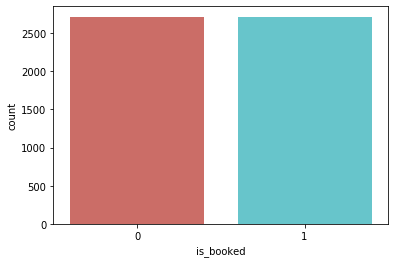

<Figure size 432x288 with 0 Axes>

In [23]:
sns.countplot(x='is_booked', data=my_balanced_data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [24]:
X_train.shape[0], X_test.shape[0]

(3801, 1629)

In [298]:
#input_shape = (1145, 1)

In [30]:
# Initialising the ANN
model = Sequential()
# Adding the input layer and the first hidden layer
model.add(Dense(units =256 , kernel_initializer = 'uniform', activation = tf.nn.relu, input_dim = 1144))
# Adding the second hidden layer
model.add(Dense(units =512 , kernel_initializer = 'uniform', activation = tf.nn.softmax))
# Adding the third hidden layer
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = tf.nn.relu))
# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = tf.nn.sigmoid))

In [34]:
model.compile(optimizer='adam',  loss='binary_crossentropy',  metrics=['accuracy'])
model.fit(x=X_train,y=y_train, epochs=10)

Epoch 1/10
3801/3801 [==============================] - 3s 662us/step - loss: 0.3854 - accuracy: 0.8195
Epoch 2/10
3801/3801 [==============================] - 2s 521us/step - loss: 0.3790 - accuracy: 0.8224
Epoch 3/10
3801/3801 [==============================] - 2s 576us/step - loss: 0.3727 - accuracy: 0.8227
Epoch 4/10
3801/3801 [==============================] - 2s 595us/step - loss: 0.3708 - accuracy: 0.8227
Epoch 5/10
3801/3801 [==============================] - 2s 548us/step - loss: 0.3650 - accuracy: 0.8258
Epoch 6/10
3801/3801 [==============================] - 2s 615us/step - loss: 0.3556 - accuracy: 0.8248
Epoch 7/10
3801/3801 [==============================] - 2s 550us/step - loss: 0.3553 - accuracy: 0.8272
Epoch 8/10
3801/3801 [==============================] - 2s 570us/step - loss: 0.3499 - accuracy: 0.8332
Epoch 9/10
3801/3801 [==============================] - 2s 528us/step - loss: 0.3476 - accuracy: 0.8345
Epoch 10/10
3801/3801 [==============================] - 2s 493u

In [35]:
model.evaluate(X_test, y_test)

1629/1629 [==============================] - 0s 247us/step


[0.5411776605012447, 0.7587476968765259]

In [36]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
confusion_matrix(y_test, y_pred)

array([[638, 182],
       [211, 598]], dtype=int64)

In [37]:
logistic_regression = LogisticRegression()

In [38]:
logistic_regression.fit(X_train, y_train)

C:\Users\QWERTY\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\QWERTY\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_pred = logistic_regression.predict(X_test)

In [40]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

73.35788827501534

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[551, 269],
       [165, 644]], dtype=int64)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72       820
           1       0.71      0.80      0.75       809

    accuracy                           0.73      1629
   macro avg       0.74      0.73      0.73      1629
weighted avg       0.74      0.73      0.73      1629

